In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ethans/Datasets/hsbc_bank_loan_data.csv.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



The given dataset appears to contain information about loan applications. Each row represents a single loan application, and the columns provide various details about the applicants and their loan requests. Here is a description of each column:

Loan_ID: Unique identifier for each loan application.

Gender: Gender of the applicant (e.g., Male, Female).

Married: Marital status of the applicant (e.g., Yes, No).

Dependents: Number of dependents the applicant has (e.g., 0, 1, 2, 3+).

Education: Educational background of the applicant (e.g., Graduate, Not Graduate).

Self_Employed: Indicates if the applicant is self-employed (e.g., Yes, No).

ApplicantIncome: Income of the applicant.

CoapplicantIncome: Income of the co-applicant (if any).

LoanAmount: The amount of the loan requested.

Loan_Amount_Term: The term (duration) of the loan in months.

Credit_History: Credit history of the applicant (e.g., 1.0 for a good credit history, 0.0 for a bad credit history).

Property_Area: Location of the property associated with the loan (e.g., Urban, Rural, Semiurban).

Loan_Status: The final status of the loan application (e.g., Y for approved, N for not approved).

The dataset contains both numerical and categorical variables, capturing various aspects that can be used to analyze loan applications and predict loan approval outcomes.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df = df.drop('Loan_ID',axis = 1)

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# No of null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# Repalce the null values
df['Gender'].fillna(method = "backfill", inplace = True) # in backfill we fill in the NAs with the next known observation
df['Married'].fillna(value = "Yes",inplace = True)
df['Dependents'].fillna(value = 0, inplace = True)
df['Self_Employed'].fillna(value = "No", inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Credit_History'].fillna(method = "backfill", inplace = True)
df['Loan_Amount_Term'].fillna(value = 360, inplace = True)

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [16]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [18]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00


In [19]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


In [20]:
# Categorical = Gender,Married,Education,Self_Employed,Property_Area

In [21]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(['Gender','Married','Education','Self_Employed','Property_Area'])
df = encoder.fit_transform(df)

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,1,5849,0.0,146.412162,360.0,1.0,1,1
1,1,2,2,1,1,4583,1508.0,128.000000,360.0,1.0,2,2
2,1,2,1,1,2,3000,0.0,66.000000,360.0,1.0,1,1
3,1,2,1,2,1,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,1,1,1,1,6000,0.0,141.000000,360.0,1.0,1,1


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Loan_Status'] = encoder.fit_transform(df['Loan_Status'])

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,1,5849,0.0,146.412162,360.0,1.0,1,0
1,1,2,2,1,1,4583,1508.0,128.000000,360.0,1.0,2,1
2,1,2,1,1,2,3000,0.0,66.000000,360.0,1.0,1,0
3,1,2,1,2,1,2583,2358.0,120.000000,360.0,1.0,1,0
4,1,1,1,1,1,6000,0.0,141.000000,360.0,1.0,1,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


<Axes: >

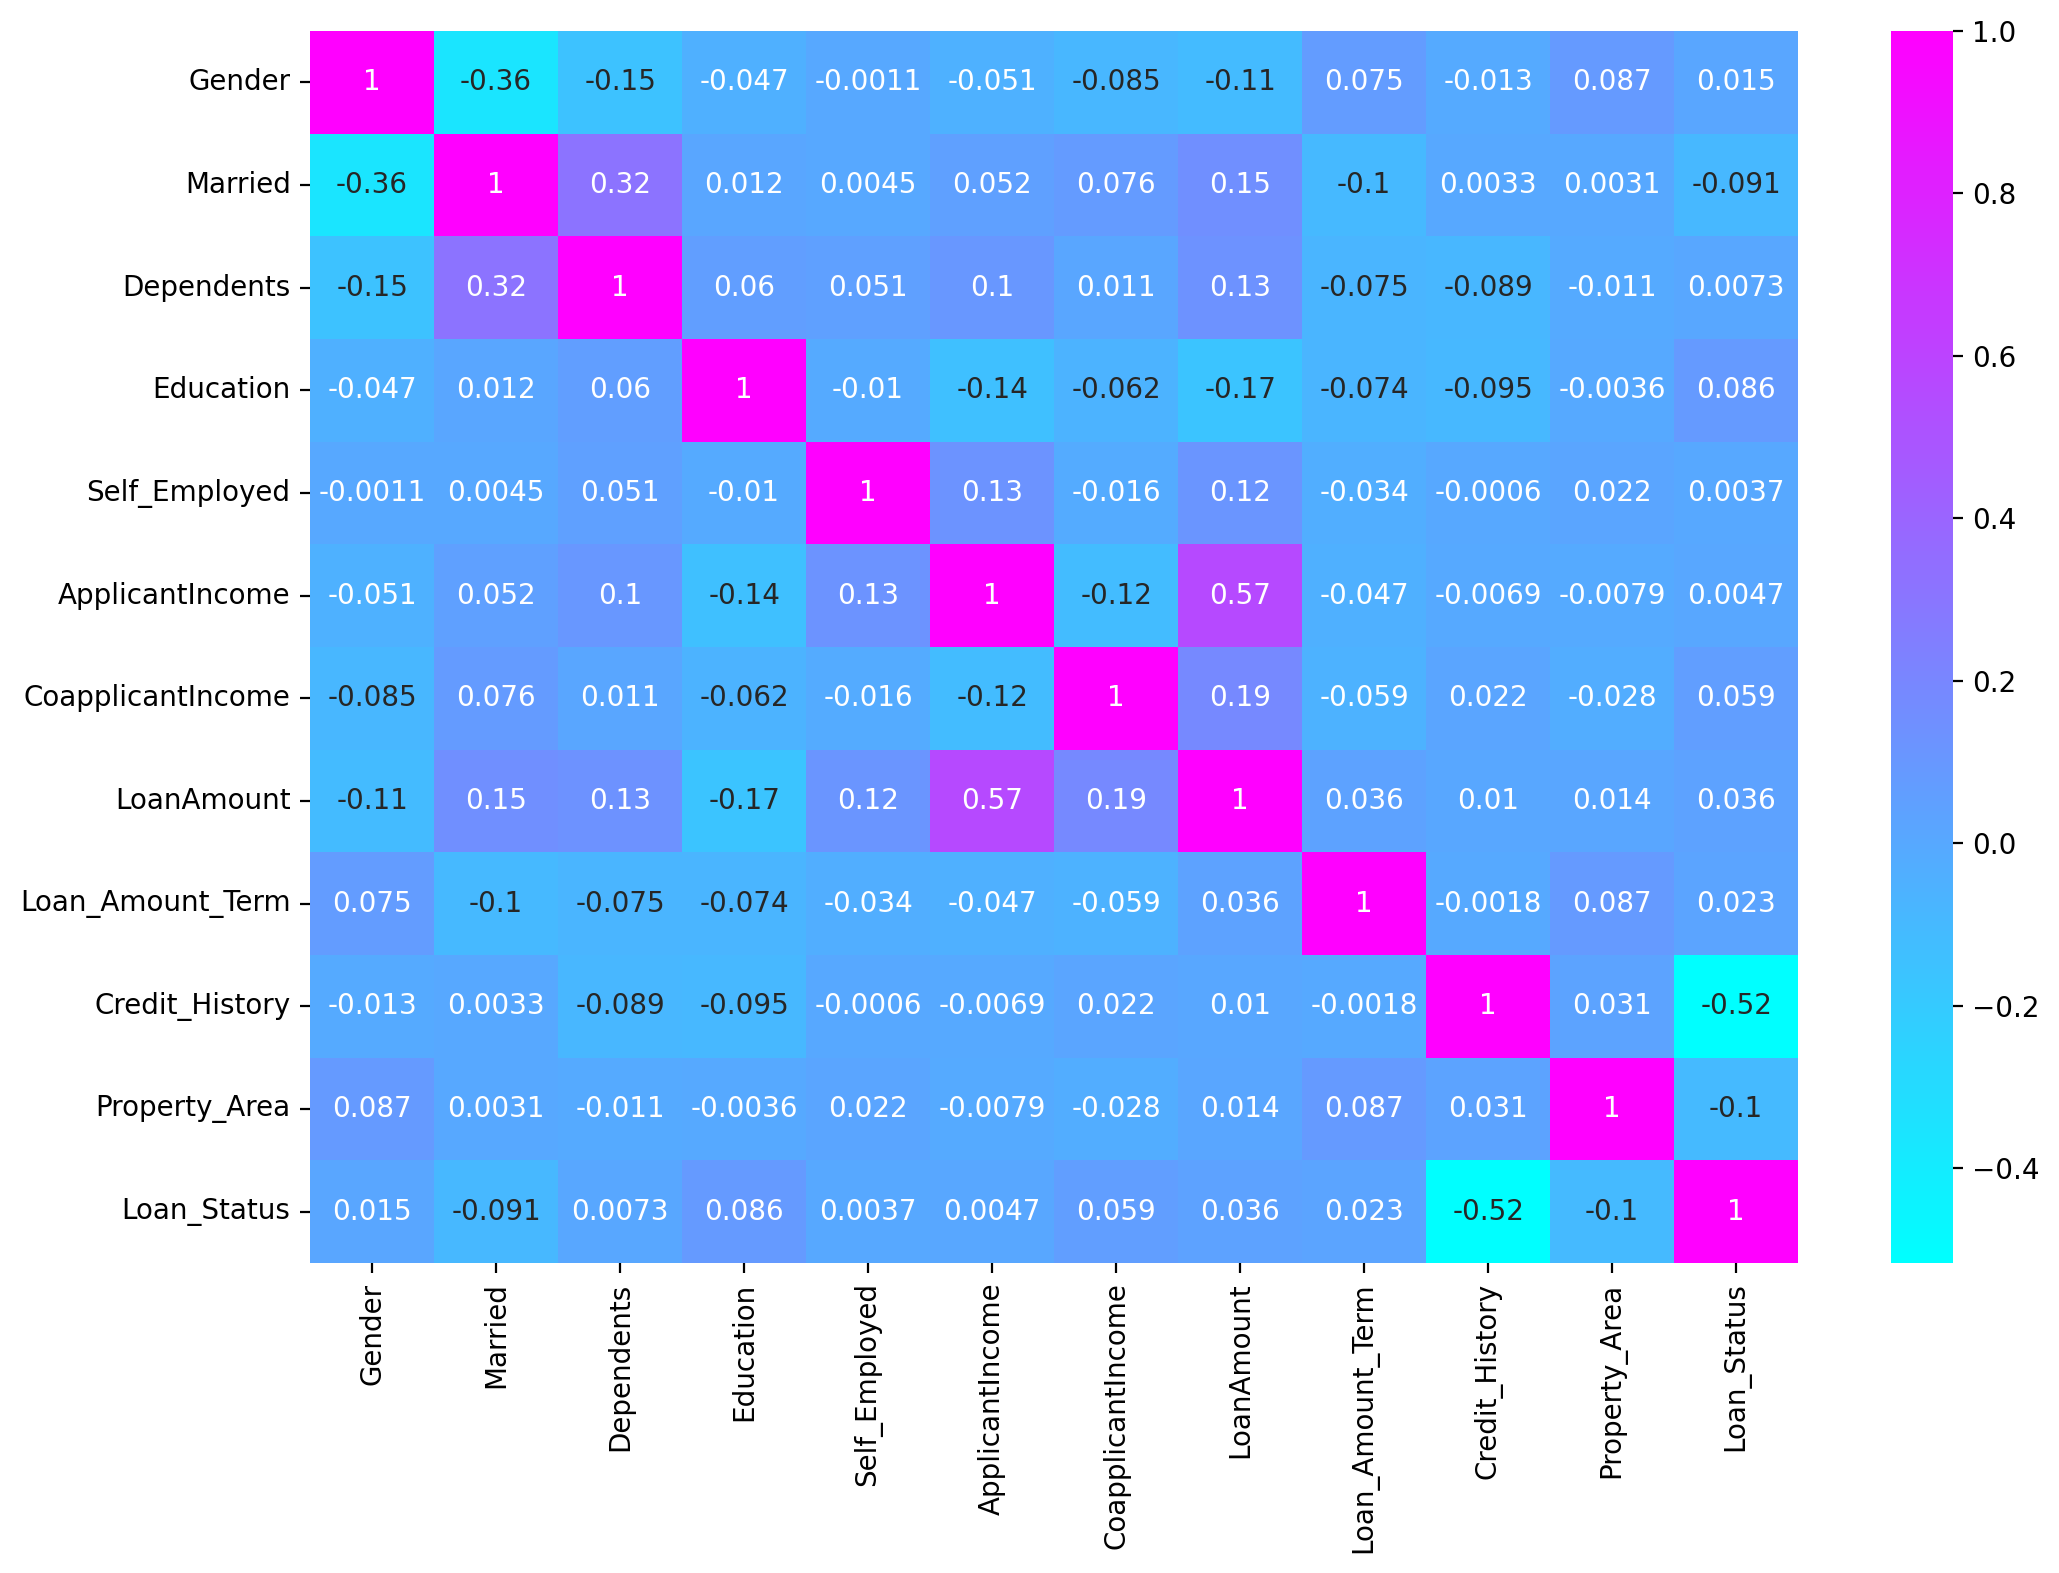

In [30]:
plt.figure(figsize = (12,8), dpi = 200)
sns.heatmap(data = df.corr(), annot = True, cmap = 'cool')

In [32]:
X = df.drop('Loan_Status',axis = 1)
y = df['Loan_Status']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

**AdaBoost Classifier**

In [34]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [36]:
ada_train = model.score(X_train,y_train)*100
ada_test = model.score(X_test,y_test)*100

In [37]:
print("Training Accuracy: ",ada_train)
print("Testing Accuracy: ",ada_test)

Training Accuracy:  84.31771894093686
Testing Accuracy:  73.98373983739837


In [38]:
ada_accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy Score: ",ada_accuracy)

Accuracy Score:  73.98373983739837


In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

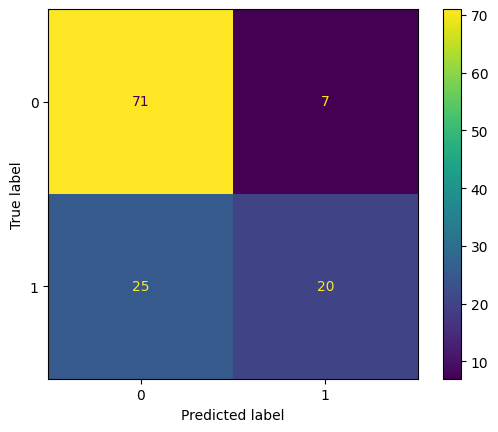

In [40]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        78
           1       0.74      0.44      0.56        45

    accuracy                           0.74       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.74      0.72       123



In [42]:
print(f1_score(y_test,y_pred))

0.5555555555555555


In [43]:
print(precision_score(y_test,y_pred))

0.7407407407407407


In [44]:
print(recall_score(y_test,y_pred))

0.4444444444444444
